In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import math
from scipy.integrate import quad

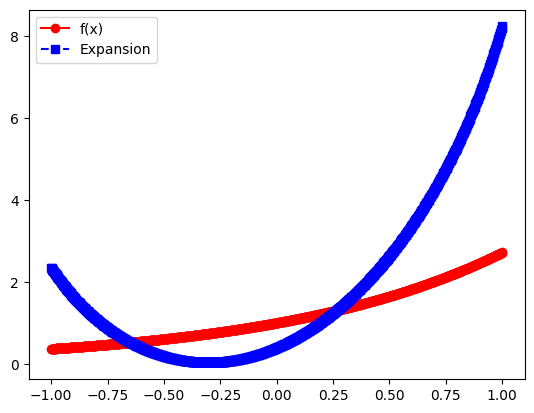

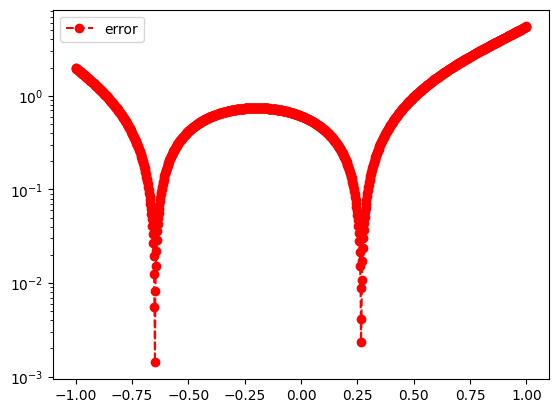

In [81]:
def driver():

#  function you want to approximate
    f = lambda x: math.exp(x)

# Interval of interest    
    a = -1
    b = 1
# weight function    
    w = lambda x: 1.

# order of approximation
    n = 2

#  Number of points you want to sample in [a,b]
    N = 1000
    xeval = np.linspace(a,b,N+1)
    pval = np.zeros(N+1)

    for kk in range(N+1):
      pval[kk] = eval_legendre_expansion(f,a,b,w,n,xeval[kk])
      
    ''' create vector with exact values'''
    fex = np.zeros(N+1)
    for kk in range(N+1):
        fex[kk] = f(xeval[kk])
        
    plt.figure()    
    plt.plot(xeval,fex,'ro-', label= 'f(x)')
    plt.plot(xeval,pval,'bs--',label= 'Expansion') 
    plt.legend()
    plt.show()    
    
    err = abs(pval-fex)
    plt.semilogy(xeval,err,'ro--',label='error')
    plt.legend()
    plt.show()
    
def eval_legendre(n, x):
    p = np.zeros(n + 1)

    phi0 = 1
    phi1 = x

    for i in range(n + 1):
        phi2 = ((2*i + 1)*x*phi1 - n*phi0)/(i + 1)
        p[i] = phi2
        
        phi0 = phi1
        phi1 = phi2

    return p      


def eval_legendre_expansion(f,a,b,w,n,x): 

#   This subroutine evaluates the Legendre expansion

#  Evaluate all the Legendre polynomials at x that are needed
# by calling your code from prelab 
  p = eval_legendre(n, x)
  # initialize the sum to 0 
  pval = 0.0    
  for j in range(0, n + 1):
      # make a function handle for evaluating phi_j(x)
      phi_j = lambda x: p[0]
      # make a function handle for evaluating phi_j^2(x)*w(x)
      phi_j_sq = lambda x: w(x)*phi_j(x)**2
      # use the quad function from scipy to evaluate normalizations
      norm_fac,err = quad(phi_j_sq, a, b)
      # make a function handle for phi_j(x)*f(x)*w(x)/norm_fac
      func_j = lambda x: phi_j(x)*f(x)*w(x)/norm_fac
      # use the quad function from scipy to evaluate coeffs
      aj,err = quad(func_j, a, b)
      # accumulate into pval
      pval = pval+aj*p[j] 
       
  return pval
    
if __name__ == '__main__':
  # run the drivers only if this is called from the command line
  driver()               
